In [63]:
from sklearn.cluster import KMeans


import pickle
import numpy as np

resultsFolder = 'results/tests/'


with open(resultsFolder + 'agentRL4.modelstate', "rb") as f:
    states = pickle.load(f)
states_array = []
for x in states:
    states_array.append(x)
    # array = np.array(x.convert('L'))
    # array = array / 255 
    # array = array.reshape(-1)
    # states_array.append(array)

In [65]:
import math
states_array = [x for x in states_array if math.isnan(x[0]) == False and math.isnan(x[1]) == False]

In [68]:
kmean = KMeans(n_clusters=4, n_init=10)
kmean.fit(states_array)

filename = resultsFolder + 'agentRL4.model'
with open(filename + 'gel', "wb") as f:
    pickle.dump(kmean, f)

In [69]:
label = kmean.predict(states_array)
u_labels = np.unique(label)

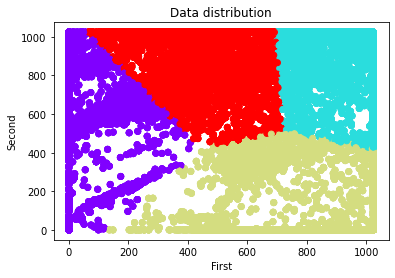

In [70]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
d = {}
d['First'] = [x[0] for x in states_array]
d['Second'] = [x[1] for x in states_array]
d['Clusters'] = label
 
plt.figure()
plt.clf()

for i in u_labels:
    plt.scatter(d['First'], d['Second'], c=d['Clusters'], cmap='rainbow',rasterized=True)
plt.title("Data distribution")
plt.xlabel("First")
plt.ylabel("Second")
pp = PdfPages('b.pdf')
pp.savefig()
pp.close()
plt.show()